# Continuous Probabilistic Methods Exercises
---

### 1. Define a function named `get_lower_and_upper_bounds` that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [32]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_lower_and_upper_bounds(series, multiplier=1.5):
    '''
    This function takes in a series and a multiplier (default=1.5). It returns
    lower and upper bounds using the IQR.
    '''
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3-q1
    lower = q1 - (multiplier*iqr)
    upper = q3 + (multiplier*iqr)
    return lower, upper

---
### 1. Using `lemonade.csv` dataset and focusing on continuous variables:

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [4]:
# acquire data
lemonade = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [6]:
# view dtypes
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [62]:
# get lower and upper bounds for each numerical column
lower_Temperature, upper_Temperature = get_lower_and_upper_bounds(lemonade.Temperature)
lower_Rainfall, upper_Rainfall = get_lower_and_upper_bounds(lemonade.Rainfall)
lower_Flyers, upper_Flyers = get_lower_and_upper_bounds(lemonade.Flyers)
lower_Price, upper_Price = get_lower_and_upper_bounds(lemonade.Price)
lower_Sales, upper_Sales = get_lower_and_upper_bounds(lemonade.Sales)

In [59]:
# view lower outliers
pd.concat([lemonade[lemonade[col] < eval('lower_' + str(col))] for col in lemonade.select_dtypes(include=['int64', 'float64'])])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [69]:
# base function courtesy of Brent, thanks!
# function to get df of all outliers
def get_all_outliers(df, multiplier=1.5):
    '''
    This function takes in a dataframe and a multiplier (default=1.5) and returns
    a dataframe of both upper- and lower-bound outliers.
    '''
    outliers = pd.DataFrame()
        # Create a for loop that will iterate through the list of quantitative values calculating the IQR value
        # and setting the upper and lower limits. 
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        # Calculate value for IQR
        iqr = q3 - q1
        # Calculate the upper and lower limits for acceptable values(inclusive)
        inner_lower_limit = q1 - (multiplier * iqr)
        inner_upper_limit = q3 + (multiplier * iqr)
        outliers = outliers.append(df[df[col] < inner_lower_limit])
        outliers = outliers.append(df[df[col] > inner_upper_limit])
    return outliers
# test function
get_all_outliers(lemonade)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15


In [75]:
# modify function to get only lower outliers
def get_outliers(df, multiplier=1.5, bound='both'):
    outliers = pd.DataFrame()
    if bound == 'both':
        # Create a for loop that will iterate through the list of quantitative values calculating the IQR value
        # and setting the upper and lower limits. 
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_lower_limit = q1 - (multiplier * iqr)
            inner_upper_limit = q3 + (multiplier * iqr)
            outliers = outliers.append(df[df[col] < inner_lower_limit])
            outliers = outliers.append(df[df[col] > inner_upper_limit])
    elif bound == 'lower':
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_lower_limit = q1 - (multiplier * iqr)
            outliers = outliers.append(df[df[col] < inner_lower_limit])
    elif bound == 'upper':
        for col in df.select_dtypes(include=['int64', 'float64']).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            # Calculate value for IQR
            iqr = q3 - q1
            # Calculate the upper and lower limits for acceptable values(inclusive)
            inner_upper_limit = q3 + (multiplier * iqr)
            outliers = outliers.append(df[df[col] > inner_upper_limit])
    return outliers
# test function
get_outliers(lemonade, bound='lower')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [66]:
# view upper outliers
pd.concat([lemonade[lemonade[col] > eval('upper_' + str(col))] for col in lemonade.select_dtypes(include=['int64', 'float64'])])

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12


In [74]:
# use function to only get upper outliers
get_outliers(lemonade, bound='upper')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12


#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept?

In [76]:
get_outliers(lemonade, 3, 'lower')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

In [77]:
get_outliers(lemonade, 3, 'upper')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


### 2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:

#### Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

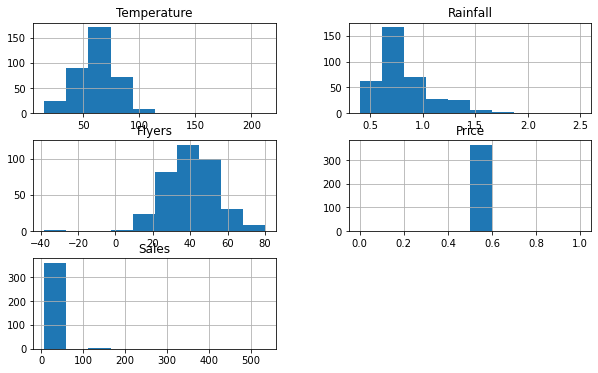

In [36]:
lemonade.hist(figsize=(10,6));

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`